<a href="https://colab.research.google.com/github/goguaD/finalProjectML/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

walmart_recruiting_store_sales_forecasting_path = kagglehub.competition_download('walmart-recruiting-store-sales-forecasting')

print('Data source import complete.')


100%|██████████| 2.70M/2.70M [00:00<00:00, 50.7MB/s]

Extracting files...
Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
from google.colab import files
uploaded = files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("Downloading Walmart Recruiting Store Sales Forecasting data...")
!kaggle competitions download -c walmart-recruiting-store-sales-forecasting

Saving kaggle.json to kaggle.json
  0% 0.00/2.70M [00:00<?, ?B/s]
100% 2.70M/2.70M [00:00<00:00, 870MB/s]


In [5]:
import zipfile
with zipfile.ZipFile('walmart-recruiting-store-sales-forecasting.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

print("Data downloaded successfully!")
print("Available files:")
!ls -la *.csv

Data downloaded successfully!
Available files:
-rw-r--r-- 1 root root 532 Jul 31 19:56 stores.csv


In [6]:
zip_files = [f for f in os.listdir('.') if f.endswith('.zip')]

for zip_file in zip_files:
    print(f"Unzipping {zip_file}...")
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall('.')
    print(f"Finished unzipping {zip_file}.")

print("All zip files processed.")
print("Available files after unzipping:")
!ls -la *.csv

Unzipping train.csv.zip...
Finished unzipping train.csv.zip.
Unzipping test.csv.zip...
Finished unzipping test.csv.zip.
Unzipping walmart-recruiting-store-sales-forecasting.zip...
Finished unzipping walmart-recruiting-store-sales-forecasting.zip.
Unzipping sampleSubmission.csv.zip...
Finished unzipping sampleSubmission.csv.zip.
Unzipping features.csv.zip...
Finished unzipping features.csv.zip.
All zip files processed.
Available files after unzipping:
-rw-r--r-- 1 root root   592289 Jul 31 19:56 features.csv
-rw-r--r-- 1 root root  2146739 Jul 31 19:56 sampleSubmission.csv
-rw-r--r-- 1 root root      532 Jul 31 19:56 stores.csv
-rw-r--r-- 1 root root  2598077 Jul 31 19:56 test.csv
-rw-r--r-- 1 root root 12842546 Jul 31 19:56 train.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")


In [8]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
sample_submission = pd.read_csv("sampleSubmission.csv")


In [9]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Features shape:", features.shape)
print("Stores shape:", stores.shape)
print("Sample Submission shape:", sample_submission.shape)


Train shape: (421570, 5)
Test shape: (115064, 4)
Features shape: (8190, 12)
Stores shape: (45, 3)
Sample Submission shape: (115064, 2)


In [10]:
display(train.head())
display(test.head())
display(features.head())
display(stores.head())
display(sample_submission.head())


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [11]:
def explore_df(df, name):
    print(f"\n{name} info:")
    print(df.info())
    print("\nMissing values:\n", df.isnull().sum())

explore_df(train, "Train")
explore_df(test, "Test")
explore_df(features, "Features")
explore_df(stores, "Stores")



Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None

Missing values:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: b

In [12]:
for df in [train, test, features]:
    df["Date"] = pd.to_datetime(df["Date"])


In [13]:
train_merged = train.merge(features, on=["Store", "Date"], how="left")
train_merged = train_merged.merge(stores, on="Store", how="left")

test_merged = test.merge(features, on=["Store", "Date"], how="left")
test_merged = test_merged.merge(stores, on="Store", how="left")


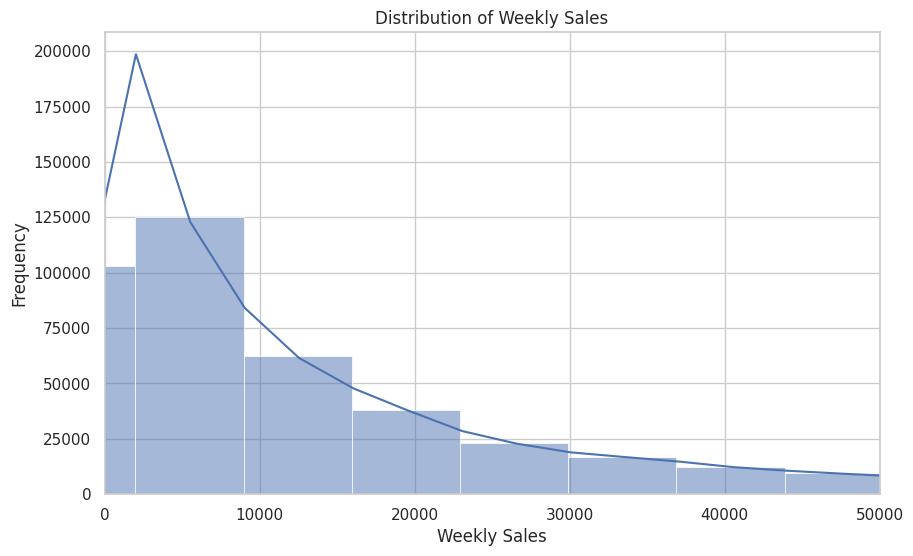

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(train["Weekly_Sales"], bins=100, kde=True)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.xlim(0, 50000)
plt.show()


Train Date Range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00
Test Date Range: 2012-11-02 00:00:00 to 2013-07-26 00:00:00


<Axes: title={'center': 'Average Weekly Sales Over Time'}, xlabel='Date'>

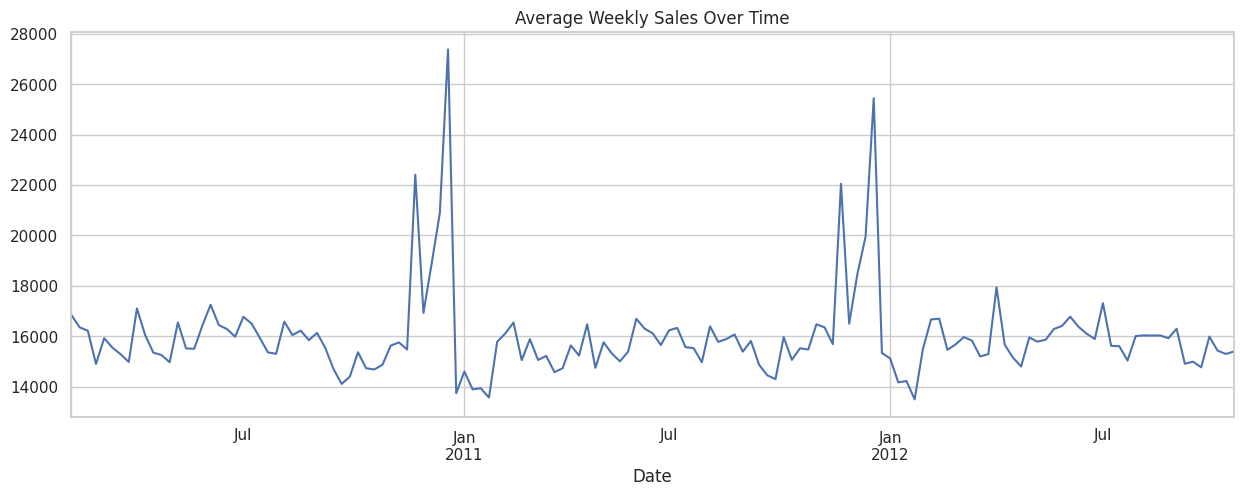

In [15]:
print(f"Train Date Range: {train['Date'].min()} to {train['Date'].max()}")
print(f"Test Date Range: {test['Date'].min()} to {test['Date'].max()}")

sales_by_date = train.groupby("Date")["Weekly_Sales"].mean()
sales_by_date.plot(figsize=(15,5), title="Average Weekly Sales Over Time")


Text(0, 0.5, 'Total Sales')

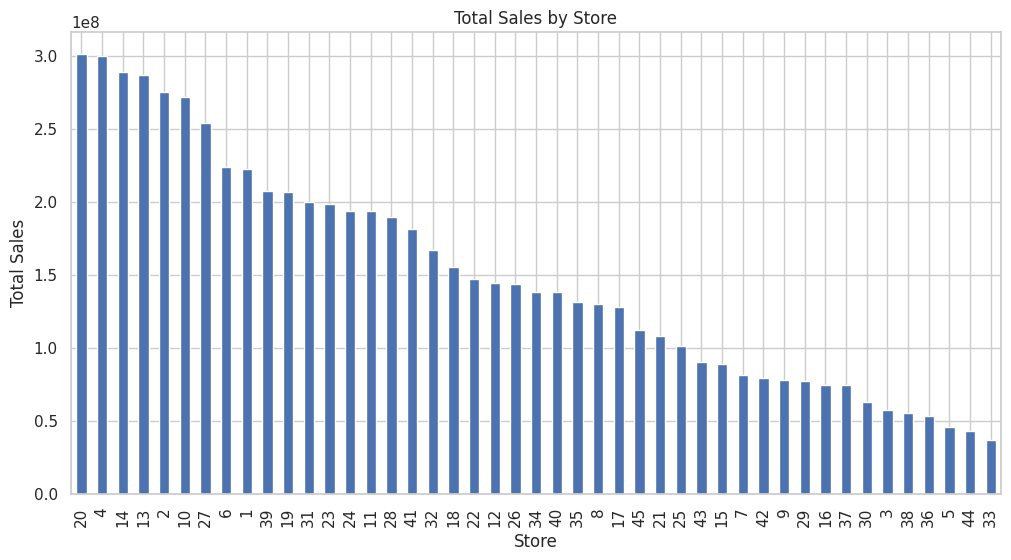

In [16]:
store_sales = train.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
store_sales.plot(kind="bar")
plt.title("Total Sales by Store")
plt.ylabel("Total Sales")


Text(0, 0.5, 'Total Sales')

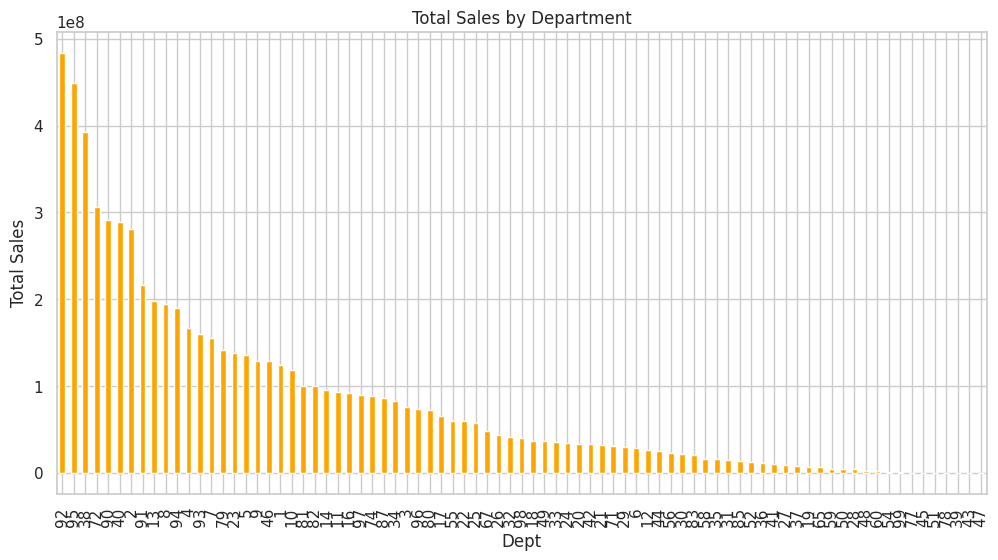

In [17]:
dept_sales = train.groupby("Dept")["Weekly_Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
dept_sales.plot(kind="bar", color='orange')
plt.title("Total Sales by Department")
plt.ylabel("Total Sales")


In [18]:
print(train_merged.columns)


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')


In [19]:
train_merged = train_merged.rename(columns={"IsHoliday_x": "IsHoliday", "IsHoliday_y": "IsHoliday_feat"})


<Axes: title={'center': 'Average Weekly Sales: Holiday vs Non-Holiday'}, xlabel='IsHoliday'>

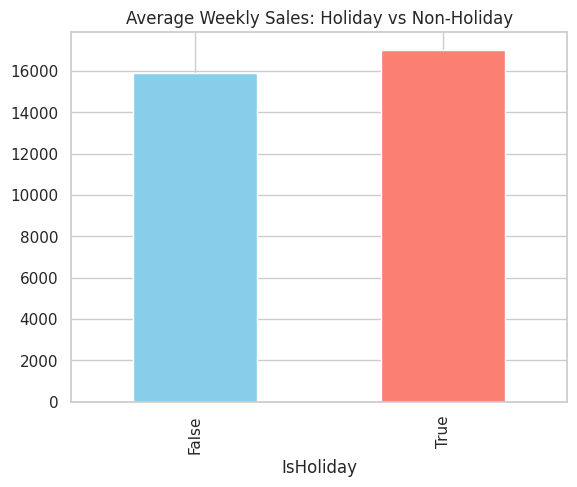

In [20]:
holiday_sales = train_merged.groupby("IsHoliday")["Weekly_Sales"].mean()
holiday_sales.plot(kind="bar", title="Average Weekly Sales: Holiday vs Non-Holiday", color=['skyblue', 'salmon'])


Text(0.5, 1.0, 'Correlation with Weekly Sales')

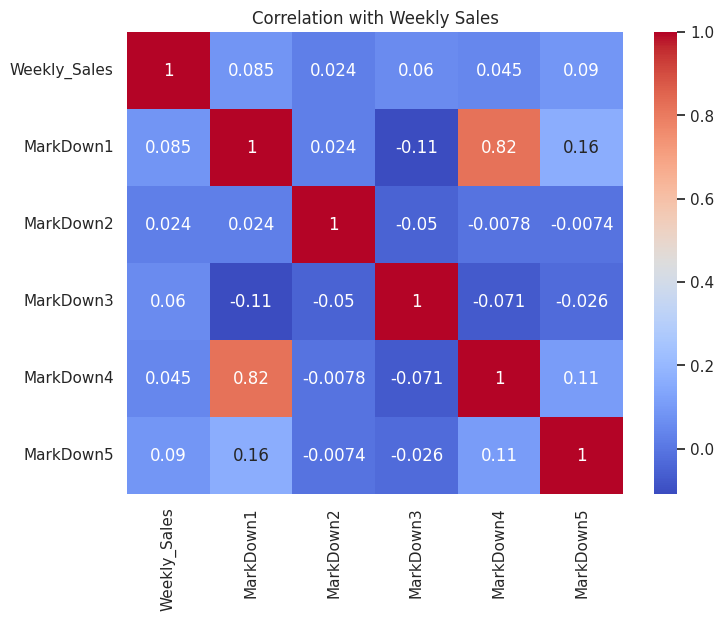

In [21]:
markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
corr = train_merged[["Weekly_Sales"] + markdown_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation with Weekly Sales")


Text(0.5, 1.0, 'Store Size vs Weekly Sales')

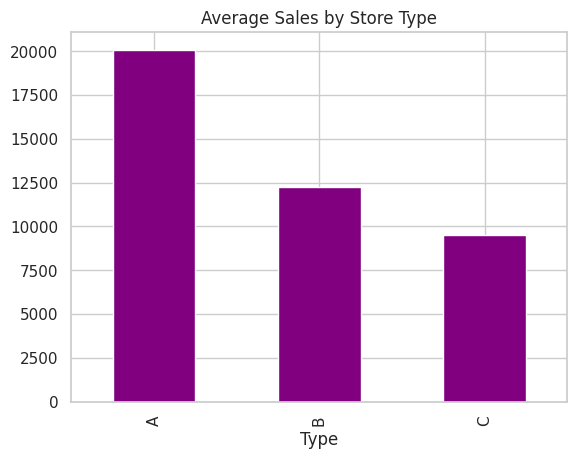

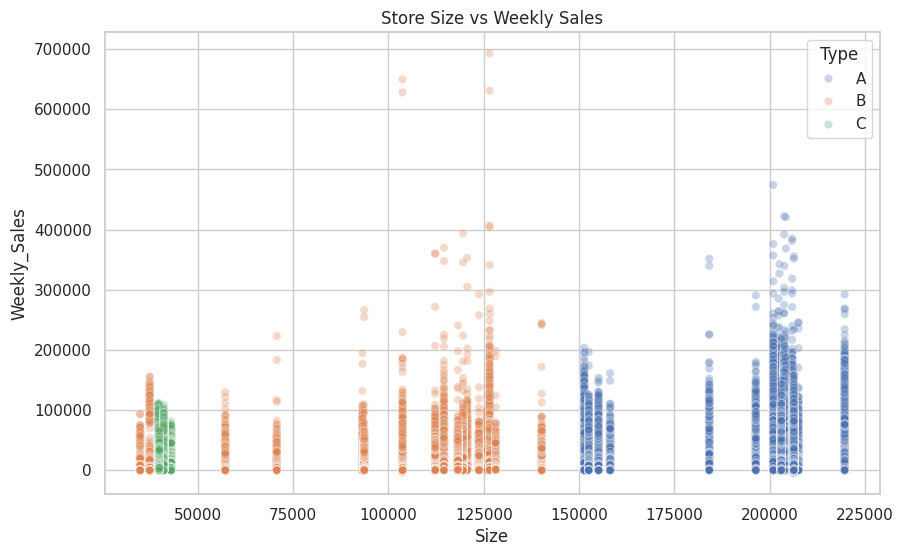

In [22]:
type_sales = train_merged.groupby("Type")["Weekly_Sales"].mean()
type_sales.plot(kind="bar", title="Average Sales by Store Type", color="purple")

plt.figure(figsize=(10,6))
sns.scatterplot(data=train_merged, x="Size", y="Weekly_Sales", hue="Type", alpha=0.3)
plt.title("Store Size vs Weekly Sales")


<Axes: title={'center': 'Average Monthly Sales'}, xlabel='Month'>

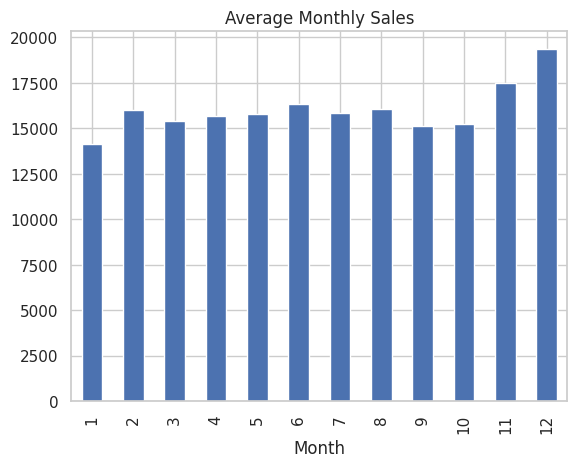

In [23]:
train_merged["Month"] = train_merged["Date"].dt.month

monthly_sales = train_merged.groupby("Month")["Weekly_Sales"].mean()
monthly_sales.plot(kind="bar", title="Average Monthly Sales")


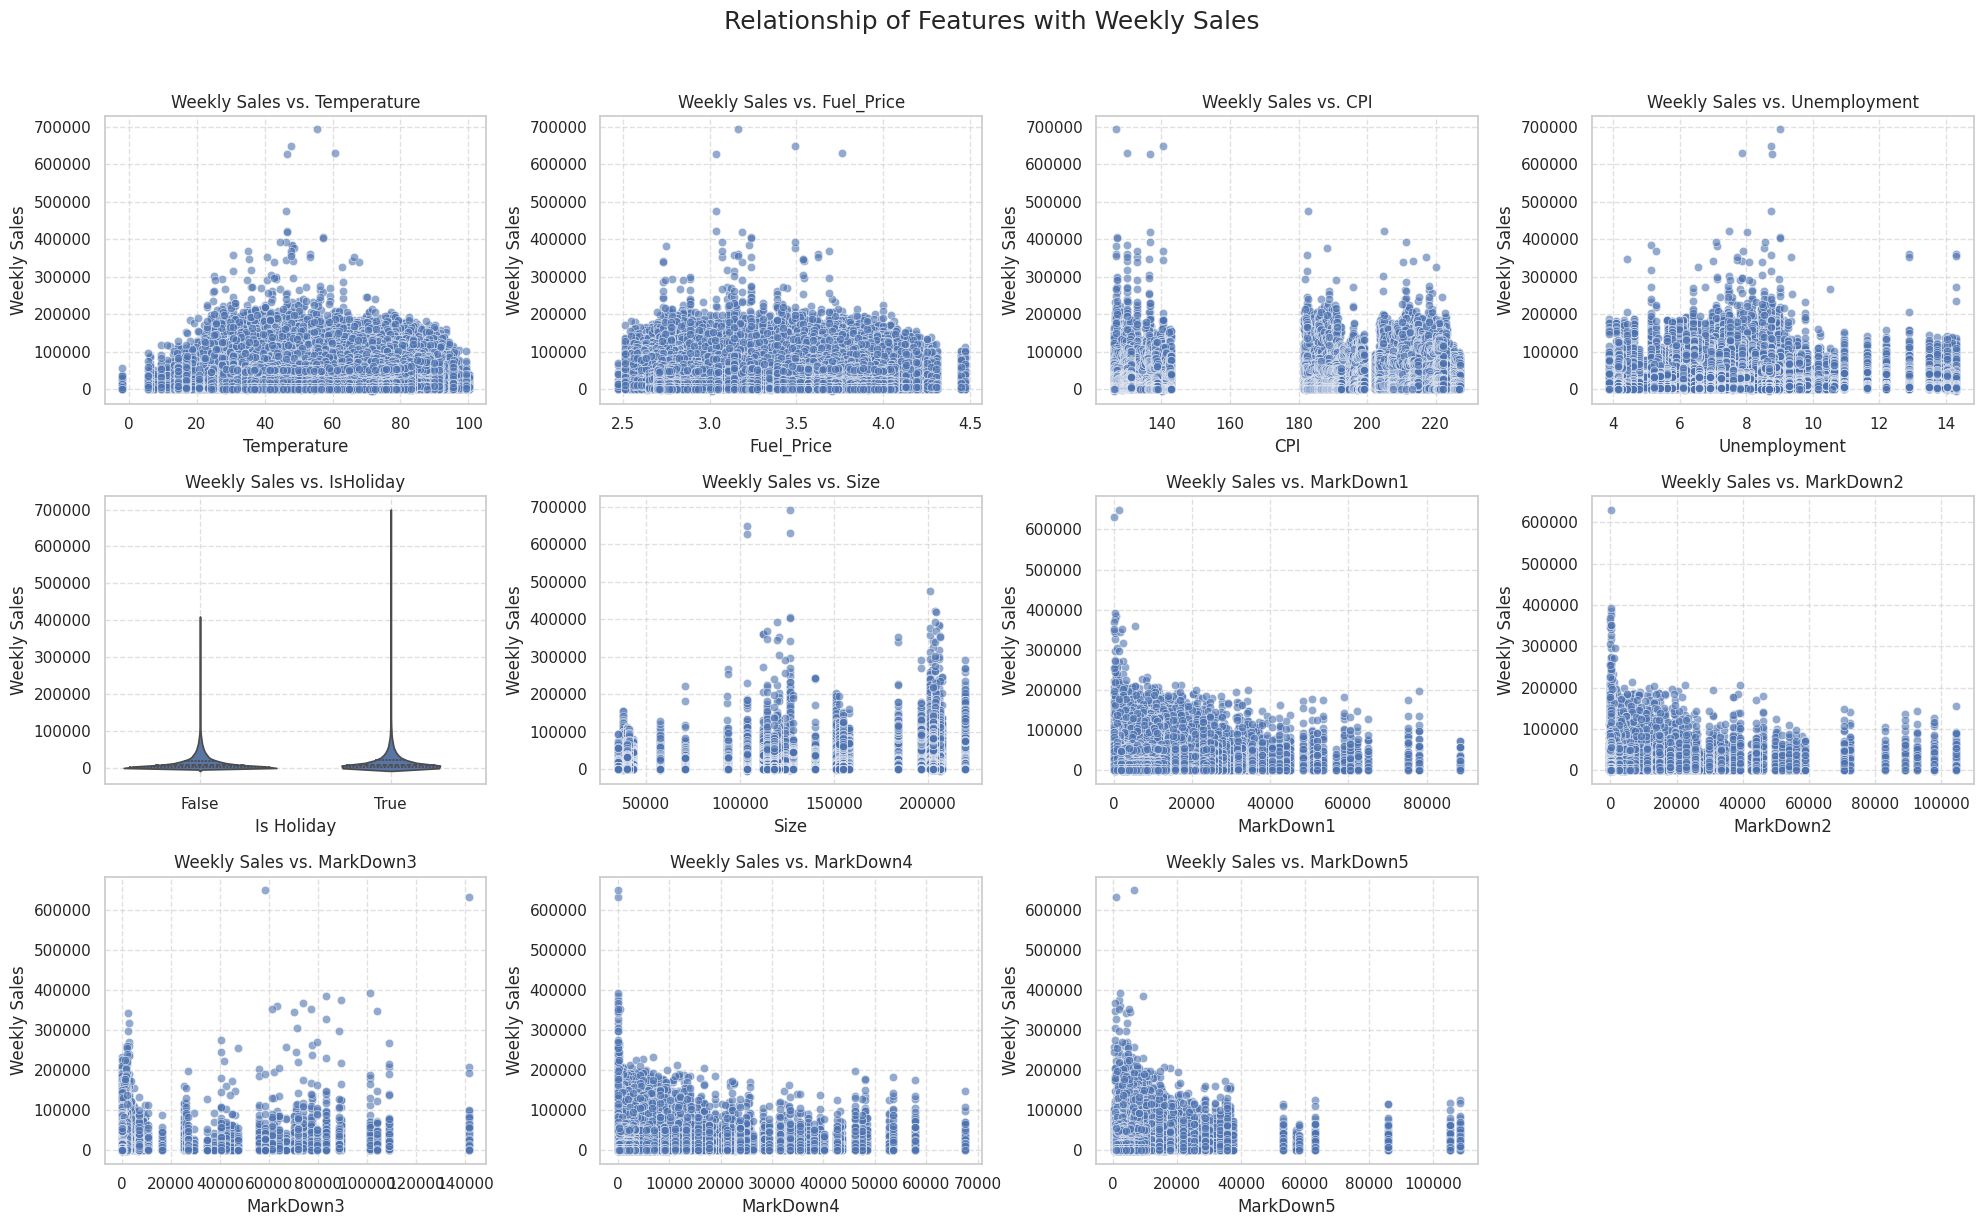

In [38]:

def plot_features_vs_sales(df, features_to_plot):

    num_features = len(features_to_plot)
    num_cols = 4
    num_rows = (num_features + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
    fig.suptitle('Relationship of Features with Weekly Sales', fontsize=18, y=1.02)

    axes = axes.flatten()

    for i, feature in enumerate(features_to_plot):
        ax = axes[i]

        if feature == 'IsHoliday':
            df['IsHoliday_str'] = df['IsHoliday'].astype(str)
            sns.violinplot(x='IsHoliday_str', y='Weekly_Sales', data=df, ax=ax, inner="quartile")
            ax.set_xlabel('Is Holiday')
            df.drop('IsHoliday_str', axis=1, inplace=True)
        else:
            sns.scatterplot(x=feature, y='Weekly_Sales', data=df, ax=ax, alpha=0.6)
            ax.set_xlabel(feature)

        ax.set_ylabel('Weekly Sales')
        ax.set_title(f'Weekly Sales vs. {feature}')
        ax.grid(True, linestyle='--', alpha=0.6)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

features = [
    'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'IsHoliday', 'Size', 'MarkDown1', 'MarkDown2',
    'MarkDown3', 'MarkDown4', 'MarkDown5'
]

plot_features_vs_sales(train_merged, features)


Automatically selected top 10 stores for Department 5: [10, 13, 4, 20, 23, 11, 6, 14, 2, 24]


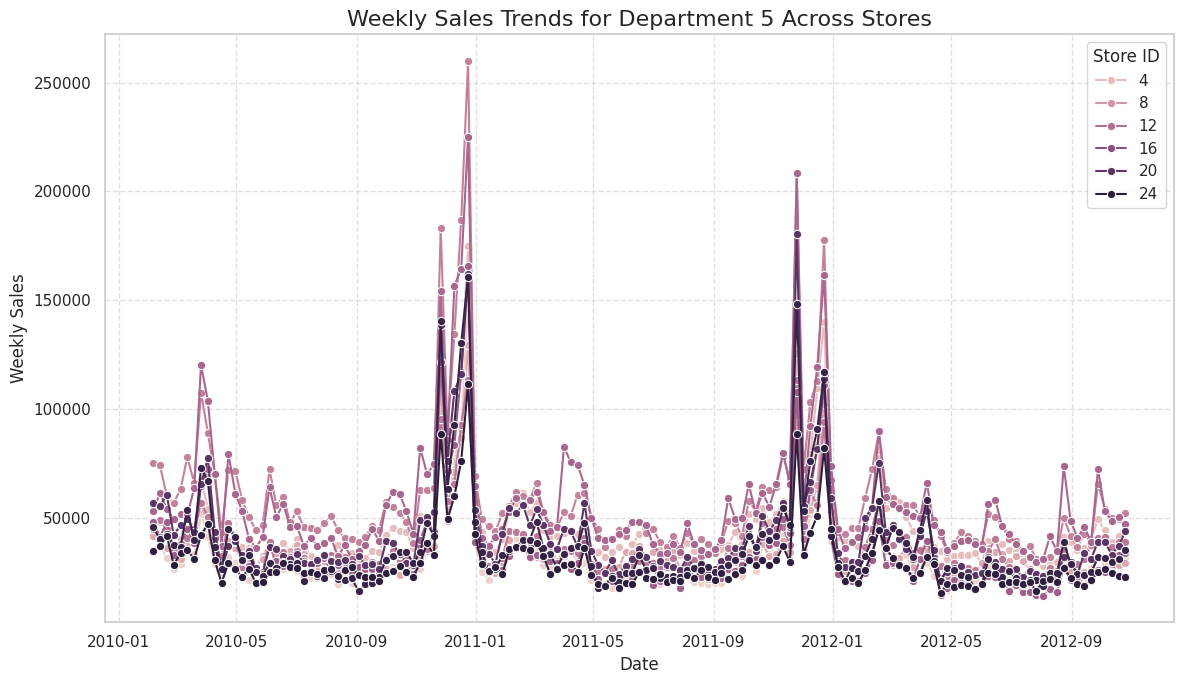

In [39]:

def plot_department_sales_across_stores(df, department_id, stores_to_plot=None):
    dept_data = df[df['Dept'] == department_id].copy()

    if dept_data.empty:
        print(f"No data found for Department {department_id}.")
        return

    if stores_to_plot is None:
        top_stores = dept_data.groupby('Store')['Weekly_Sales'].sum().nlargest(10).index
        stores_to_plot = top_stores.tolist()
        print(f"Automatically selected top 10 stores for Department {department_id}: {stores_to_plot}")

    plot_data = dept_data[dept_data['Store'].isin(stores_to_plot)]

    if plot_data.empty:
        print(f"No data found for Department {department_id} in the specified stores: {stores_to_plot}.")
        return

    plt.figure(figsize=(12, 7))
    sns.lineplot(
        data=plot_data,
        x='Date',
        y='Weekly_Sales',
        hue='Store',
        marker='o'
    )

    plt.title(f'Weekly Sales Trends for Department {department_id} Across Stores', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='Store ID')
    plt.tight_layout()
    plt.show()
department_to_check = 5
plot_department_sales_across_stores(train_merged, department_to_check)




Plotting autocorrelation for Store 1, Department 1...


<Figure size 1200x700 with 0 Axes>

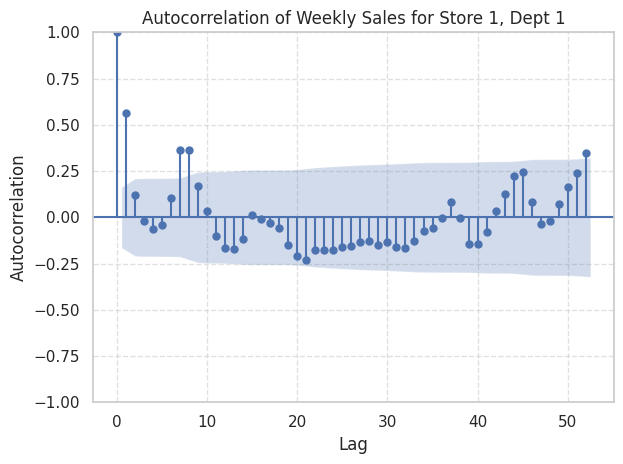

In [40]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import pandas as pd

def plot_autocorrelation(df, store_id, department_id, lags=52):

    time_series = df[(df['Store'] == store_id) & (df['Dept'] == department_id)]['Weekly_Sales']

    if time_series.empty:
        print(f"No data found for Store {store_id} and Department {department_id}.")
        return

    plt.figure(figsize=(12, 7))
    plot_acf(time_series, lags=lags, title=f'Autocorrelation of Weekly Sales for Store {store_id}, Dept {department_id}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

print("\nPlotting autocorrelation for Store 1, Department 1...")
plot_autocorrelation(train_merged, store_id=1, department_id=1)


3. Plotting Box Plots for Weekly_Sales against Store Type and IsHoliday...


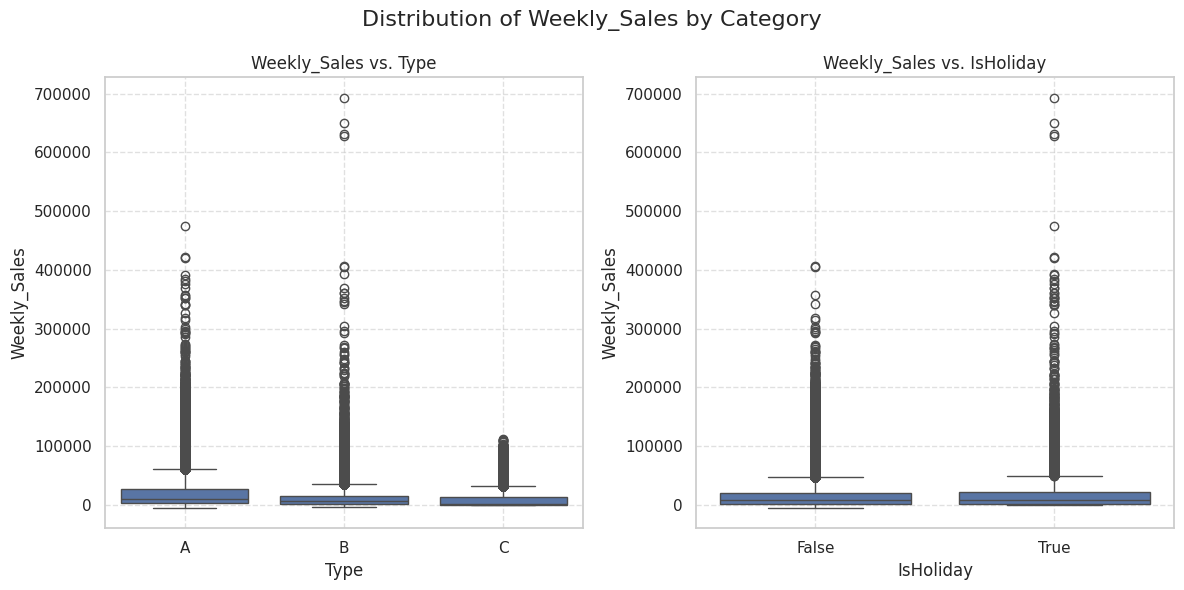

In [41]:

def plot_boxplots_by_category(df, target_col, category_cols):
    num_plots = len(category_cols)
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 6, 6))
    if num_plots == 1:
        axes = [axes]

    fig.suptitle(f'Distribution of {target_col} by Category', fontsize=16)

    for i, cat_col in enumerate(category_cols):
        sns.boxplot(x=df[cat_col], y=df[target_col], ax=axes[i])
        axes[i].set_title(f'{target_col} vs. {cat_col}')
        axes[i].set_xlabel(cat_col)
        axes[i].set_ylabel(target_col)
        axes[i].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

print("\n3. Plotting Box Plots for Weekly_Sales against Store Type and IsHoliday...")
categorical_columns = ['Type', 'IsHoliday']
plot_boxplots_by_category(train_merged, 'Weekly_Sales', categorical_columns)

